# 04-Plotting

This notebook gives an introduction to visualizing data in Python. It shows how to create four different types of plots:
- Line plot
- Scatter plot
- Bar plot
- Histogram

`matplotlib.pyplot` is the main Python package for plotting. For an overview of the package (and tons of examples), check out [chapter 4](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) in the Python Data Science Handbook. 

Before we can plot, we must first import the packages into our program using the `import` function. It is convention to assign `matplotlib.pylot` the shorter name `plt`.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Object-oriented interface

The `matplotlib` package is huge(!!!), and there are many different ways to plot in Python.

E.g. `plot` takes a sequence of x-values and a sequence of y-values, and creates a line plot.

In [3]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

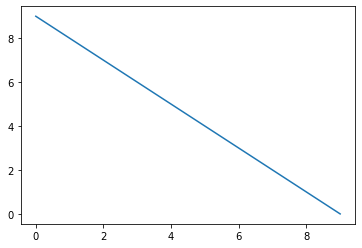

In [4]:
plt.plot(x, y)

Although we can produce simple plots with a one-liner such as above, we will instead use the *object-oriented interface* (OOI) to create plots. While this requires a few more lines of code, it gives us more flexibility later on.

In OOI, we use the `subplots` function to create seperate `Figure` and `Axes` objects.

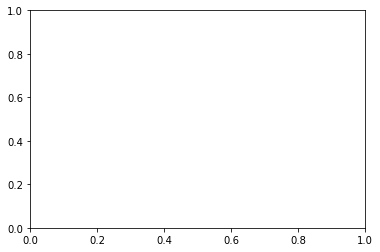

In [9]:
fig, ax = plt.subplots()

This line of code creates a figure and adds axes to it. 

It is on the axes that we do the actual plotting, while the figure is the final image.

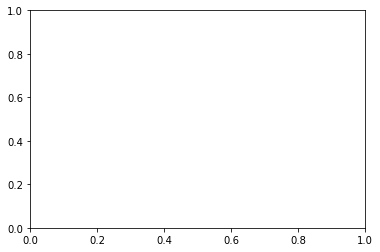

In [6]:
fig

In [10]:
ax

<AxesSubplot:>

Once we have created the `Figure` and `Axes` objects, we can use the plotting functions from `matplotlib` to plot any sequence of values on the figure's axes. 

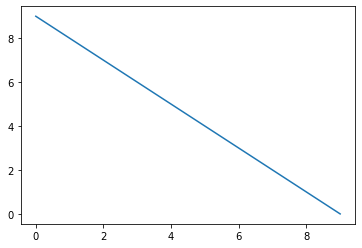

In [12]:
# step 1: create figure and axes
fig, ax = plt.subplots()

# step 2: plot on the figure's axes
ax.plot(x, y)

# step 3: display figure
plt.show() 

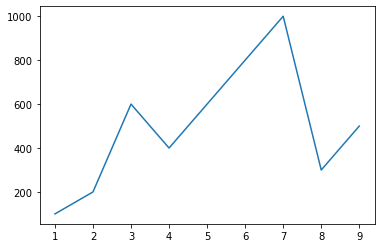

In [14]:
x=[1,2,3,4,5,6,7,8,9]
y=[100,200,600,400,600,800,1000,300,500]

figu, axe = plt.subplots()

axe.plot(x,y)

plt.show()

## Plots

### Line plot

Line plots are useful for visualizing changes in a variable over time.

Let us plot the closing price of the Apple stock over time.

In [10]:
apple = pd.read_csv('data/AAPL.csv')

apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.333511,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.610840,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.197395,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.848442,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,75.036385,132079200


We first change the data type of the `Date` column from `str` to `datetime`.

In [17]:
apple['Date'] = pd.to_datetime(apple['Date'])

Again, we create a line plot using `plot`, while specifying which column to plot on the x-axis and which column to plot on the y-axis.

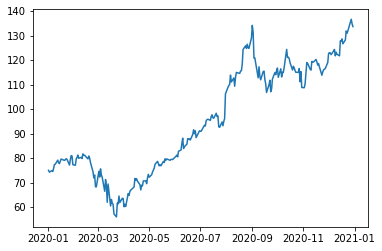

In [18]:
fig, ax = plt.subplots()

ax.plot(apple['Date'],  # x-values
        apple['Close']) # y-values

plt.show()

`plot` has many optional parameters. We can change the default values of the parameters `color` and `linestyle`.

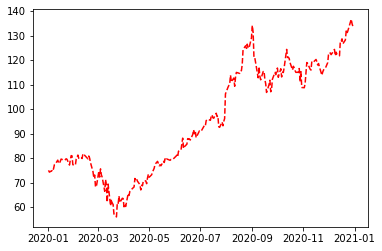

In [19]:
fig, ax = plt.subplots()

ax.plot(apple['Date'],  
        apple['Close'],
        color = 'red',    # color
        linestyle = '--') # linestyle 

plt.show()

See the [function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for an overview of the optional parameters in `plot`.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Create a line plot of the daily opening price of the Apple stock. Set the color of the line plot equal to <code>black</code> and the line style equal to <code>:</code>.
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
fig, ax = plt.subplots()

ax.plot(apple['Date'],  
        apple['Open'],
        color = 'black',    
        linestyle = ':') 

plt.show()
```

</p>
</details> 

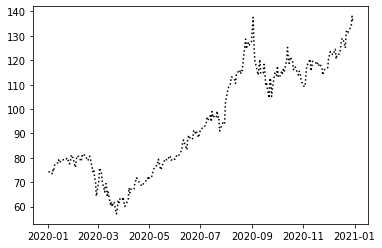

In [20]:
fig, ax = plt.subplots()

ax.plot(apple["Date"],
       apple["Open"],
       color="black",
       linestyle=':')

plt.show()

If we want to create line plots for several columns in the same figure, we can execute the `plot` function several times on the `Axes` object. Each time, we specify a new column to place on the y-axis.

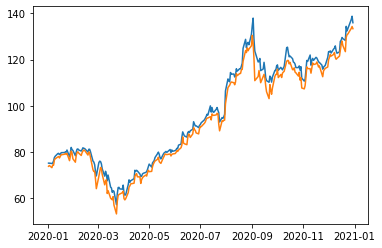

In [21]:
fig, ax = plt.subplots()

# line plot 1
ax.plot(apple['Date'],  
        apple['High'])

# line plot 2
ax.plot(apple['Date'],  
        apple['Low']) 

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Notice that when we add multiple line plots on the same <code>Axes</code> object, the y-values must be measured in the same units in order for the plot to make sense. What happens if we plot both the daily closing price and traded volume in the same plot?
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
fig, ax = plt.subplots()

# volume
ax.plot(apple['Date'],  
        apple['Volume']) 

# close price
ax.plot(apple['Date'],
        apple['Close'])

plt.plot()
```

</p>
</details> 

[]

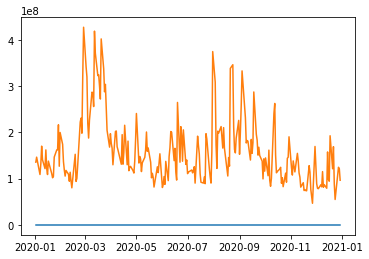

In [23]:
fig, ax = plt.subplots()
ax.plot(apple["Date"],
       apple["Close"])

ax.plot(apple["Date"],
       apple["Volume"])

plt.show()

### Scatter plot

In scatter plots, we plot all of the observations in a `DataFrame` along two dimensions (i.e. columns). Scatter plots are usueful for visualizing the relationship between two columns.

Let us create a scatter plot between the daily opening and closing price.

We use `scatter` to create a scatter plot. We must give `scatter` the columns to plot on the x-axis and the y-axis, respectively.

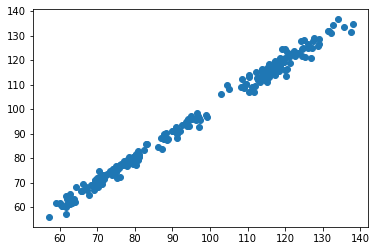

In [24]:
fig, ax = plt.subplots()

ax.scatter(apple['Open'], # x-values
           apple['Close'])  # y-values

plt.show()

We can change the default values of the parameters `color` and `marker`.

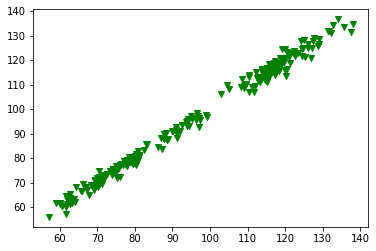

In [25]:
fig, ax = plt.subplots()

ax.scatter(apple['Open'], 
           apple['Close'],
           color = 'green',  # color
           marker = 'v')     # marker

plt.show()

See the [function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for an overview of the optional parameters in `scatter`.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Create a scatter plot between the daily closing price and volume traded. Set the color of the scatter plot equal to <code>purple</code> and the marker style equal to <code>+</code>. (Notice that this graph makes more sense than the graph in the previous exercise as the volume traded and closing price are no longer measured on the same axis).
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
fig, ax = plt.subplots()

ax.scatter(apple['Close'], 
           apple['Volume'],
           color = 'purple',  # color
           marker = '+')      # marker

plt.plot()
```

</p>
</details> 

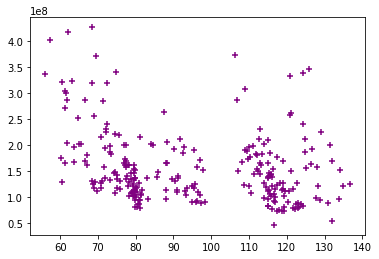

In [26]:
fig, ax = plt.subplots()
ax.scatter(apple["Close"],
          apple["Volume"],
          color="purple",
          marker="+")

plt.show()

### Bar plot

Bar plots are used to represent categorical data, with the *height* of the bars proportional to the *value* in each category.

Let us create a bar plot of the number of passengers traveling 1st, 2nd and 3rd class.

In [3]:
titanic = pd.read_csv('data/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


First, we use `value_counts` to calculate the number of passengers traveling in 1st, 2nd and 3rd class. This returns a `Series`.

In [28]:
pclass = titanic['Pclass'].value_counts()

pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

We then create a list of categories to place on the x-axis.

In [29]:
categories =  ['3rd class', '1st class', '2nd class']

categories

['3rd class', '1st class', '2nd class']

We use `bar` to create a bar plot. We give `bar` the categories to place on the x-axis, and the values for each category to plot on the y-axis.

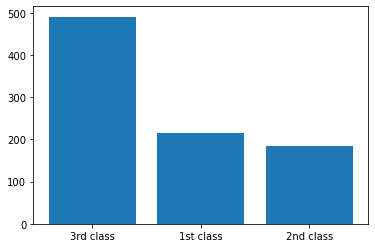

In [30]:
fig, ax = plt.subplots()

ax.bar(categories, # x-values
       pclass)     # y-values

plt.show()

We can change the default values of the optional parameters `width` and `alpha`.

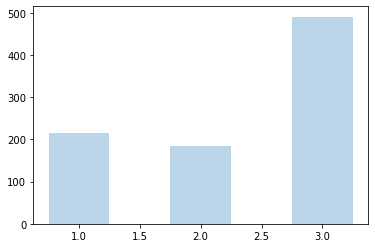

In [36]:
fig, ax = plt.subplots()

ax.bar(pclass.index, # use index instead of self-defined category names
       pclass,
       width = 0.5,  # width
       alpha = 0.3)  # transparency

plt.show()

See the [function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) for an overview of the optional parameters in `bar`.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Illustrate the number of passengers that survived and that did not survive in a bar plot. Set the color of the bars to <code>white</code> and the outline of the bars to <code>purple</code>.
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
heights = titanic['Survived'].value_counts()
labels = ['Not survived', 'Survived']

fig, ax = plt.subplots()

ax.bar(labels,
       heights,
       edgecolor = 'purple',
       color = 'white', 
       linewidth = 3)

plt.show()
```

</p>
</details> 

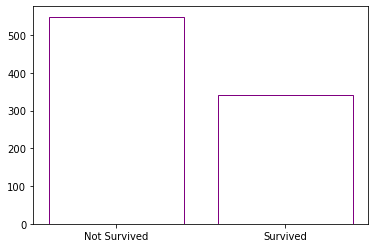

In [45]:
survived = titanic["Survived"].value_counts()
categories = ["Not Survived", "Survived"]

fig, ax = plt.subplots()

ax.bar(categories,
      survived,
      color="white",
      edgecolor="purple")

plt.show()

### Histograms

We use histograms to visually represent the distribution (i.e. frequency) of a numeric column in a `DataFrame`.

`describe` gives us limited information about the distribution of the age of the passengers in our `titanic` data. 

However, we can create a histogram in order to see the full distribution.

In [46]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


We use `hist` to create a histogram. Notice that `hist` requires only one sequence of values.

`hist` will split the sequence of values into bins and use these bins on the x-axis, while the number of occurrences within each bin will be on the y-axis.

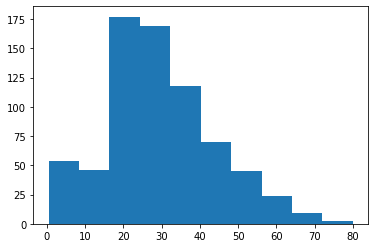

In [4]:
figure, ax = plt.subplots()

ax.hist(titanic['Age'])

plt.show()

We can choose the number of bins to split the variable into by specifying the parameter `bins`. Notice that setting `density = True` will display the *shares* instead of *frequency counts* on the y-axis.

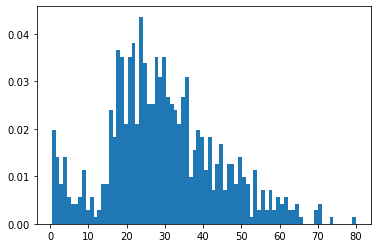

In [8]:
figure, ax = plt.subplots()

ax.hist(titanic['Age'],
        bins = 80,       # bins
        density = True)  # density

plt.show()

See the [function documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for an overview of the optional parameters in `hist`.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Create a histogram of the closing price of the Apple stock. Set the number of bins equal to <code>50</code> and the color of the bars equal to <code>grey</code>.
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
fig, ax = plt.subplots()

ax.hist(apple['Close'], 
        bins = 50,
        color = 'grey')

plt.show()
```

</p>
</details> 

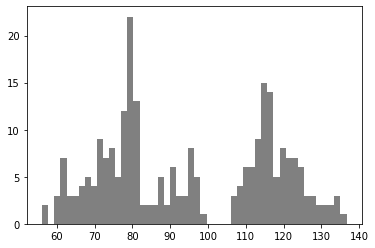

In [12]:
figure,ax=plt.subplots()

ax.hist(apple["Close"],
       bins=50,
       color="grey")

plt.show()

## Customize the plot

We can use additional functions from `matplotlib` in order to customize the plot.

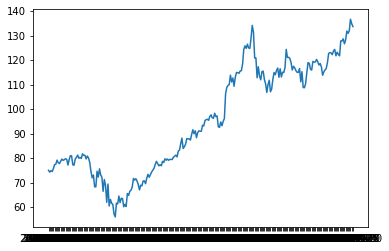

In [13]:
fig, ax = plt.subplots() 

ax.plot(apple['Date'],
        apple['Close'])

plt.show()

`subplots` has a parameter `figsize` that we can specify in order to change the size of the figure.

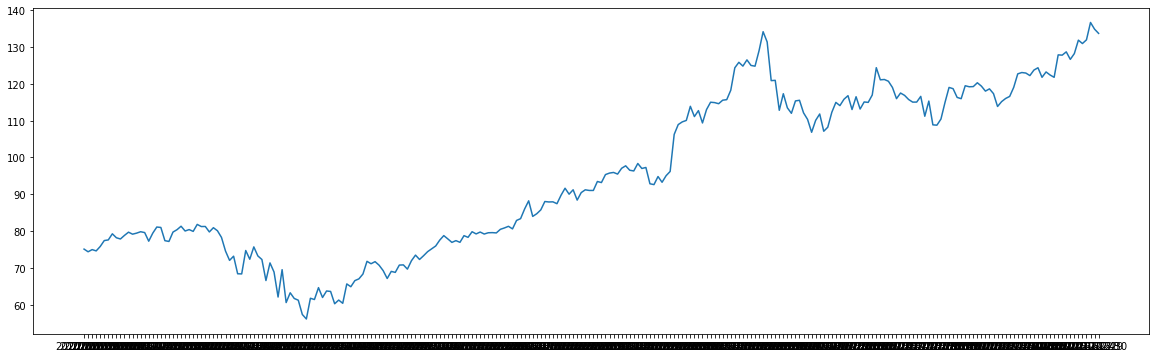

In [15]:
# set figsize
fig, ax = plt.subplots(figsize = (20, 6)) 

ax.plot(apple['Date'],
        apple['Close'])

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Use the histogram of the age of the passengers in the <code>titanic</code> data that we created above, and make the plot wider.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
figure, ax = plt.subplots(figsize = (8, 3))

ax.hist(titanic['Age'])

plt.show()
```

</p>
</details> 

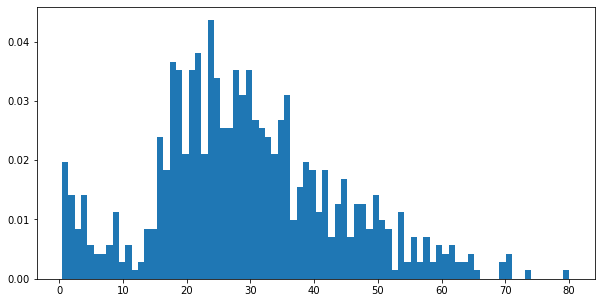

In [18]:
figure, ax = plt.subplots(figsize=(10,5))

ax.hist(titanic['Age'],
        bins = 80,      
        density = True)  

plt.show()

We can use the functions `set_ylabel` and `set_xlabel` to add labels on the figure's axes.

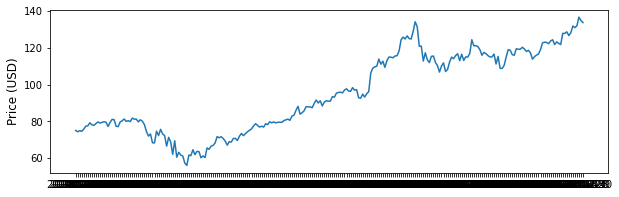

In [22]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(apple['Date'],
        apple['Close'])

# set axis label
ax.set_ylabel('Price (USD)', fontsize = 12) 

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Continue with the histogram and add a label to the x-axis.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
figure, ax = plt.subplots(figsize = (8, 3))

ax.hist(titanic['Age'])

ax.set_xlabel('Age')

plt.show()
```

</p>
</details> 

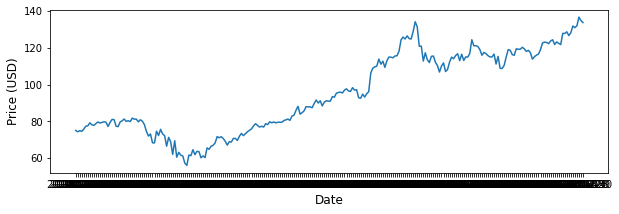

In [24]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.hist(titanic["Age"])
ax.set_xlabel("Age")

plt.show()

We can use the functions `set_xlim` and `set_ylim` to restrict the ranges of the axis.

In [25]:
apple['Date'].min()

'2020-01-02'

In [26]:
apple['Date'].max()

'2020-12-30'

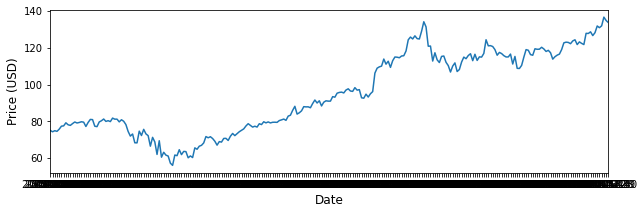

In [27]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(apple['Date'],
        apple['Close'])

ax.set_ylabel('Price (USD)', fontsize = 12)
ax.set_xlabel("Date",fontsize=12)


# set axis range
ax.set_xlim(apple['Date'].min(), # minimum
            apple['Date'].max()) # maximum

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Set the ranges on the x-axis in the histogram equal to the minimum and maximum age observed in the <code>titanic</code> data.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
figure, ax = plt.subplots(figsize = (8, 3))

ax.hist(titanic['Age'])

ax.set_xlabel('Age')

ax.set_xlim(titanic['Age'].min(), titanic['Age'].max())

plt.show()
```

</p>
</details> 

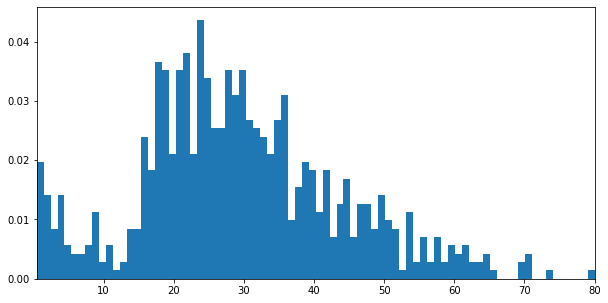

In [30]:
figure, ax = plt.subplots(figsize=(10,5))

ax.hist(titanic['Age'],
        bins = 80,      
        density = True)  

ax.set_xlim(titanic["Age"].min(),
           titanic["Age"].max())

plt.show()

We can use `set_title` to add a title to the plot.

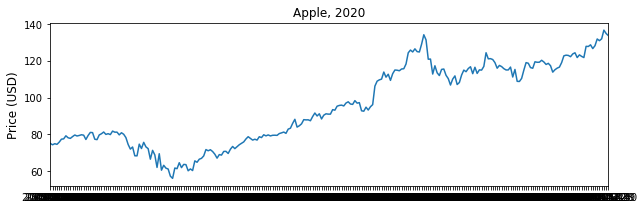

In [31]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(apple['Date'],
        apple['Close'])

ax.set_ylabel('Price (USD)', fontsize = 12)

ax.set_xlim(apple['Date'].min(), 
            apple['Date'].max()) 

# set plot title
ax.set_title('Apple, 2020')

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Add a short title that explains what is plotted in the histogram.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
figure, ax = plt.subplots(figsize = (8, 3))

ax.hist(titanic['Age'])

ax.set_xlabel('Age')

ax.set_xlim(titanic['Age'].min(), titanic['Age'].max())

ax.set_title('Age distribution of passengers on Titanic')

plt.show()
```

</p>
</details> 

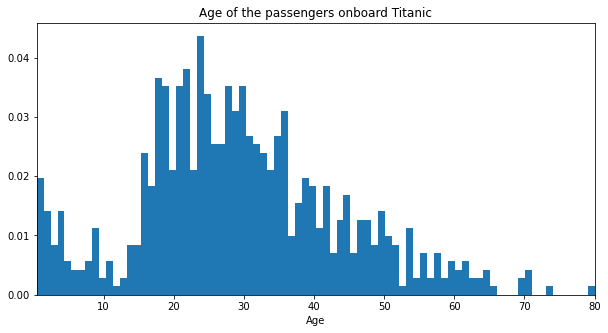

In [33]:
figure, ax = plt.subplots(figsize=(10,5))

ax.hist(titanic['Age'],
        bins = 80,      
        density = True)  

ax.set_xlim(titanic["Age"].min(),
           titanic["Age"].max())
ax.set_xlabel("Age")
ax.set_title("Age of the passengers onboard Titanic")

plt.show()

We have so far only displayed the plots inside our program. Once we terminate the program, all of our plots are lost.

`savefig` saves the plot to our comupter. As a default, the plot is saved in the same folder as the notebook. However, we can save the figure in a subfolder by specifying the path to the folder.

(Notice that we no longer need use `show` in order to display the plot).

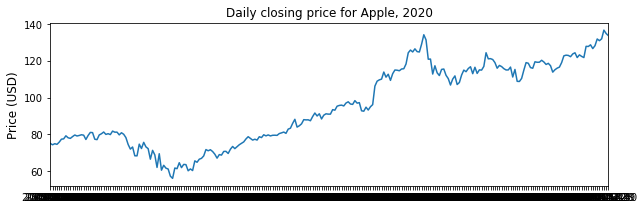

In [35]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(apple['Date'],
        apple['Close'])

ax.set_ylabel('Price (USD)', fontsize = 12)

ax.set_xlim(apple['Date'].min(), 
            apple['Date'].max()) 


ax.set_title('Daily closing price for Apple, 2020')

# save figure
plt.savefig('plots/Apple.png')

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Save the final histogram in the <code>plots</code> folder. Notice that the label on the x-axis is cut off... Google and see if you can find a solution (hint: you need to specify an additional parameter in <code>savefig</code>.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
figure, ax = plt.subplots(figsize = (8, 3))

ax.hist(titanic['Age'])

ax.set_xlabel('Age')

ax.set_xlim(titanic['Age'].min(), titanic['Age'].max())

ax.set_title('Age distribution of passengers on Titanic')

plt.savefig('plots/Titanic.png', bbox_inches = 'tight')
```

</p>
</details> 

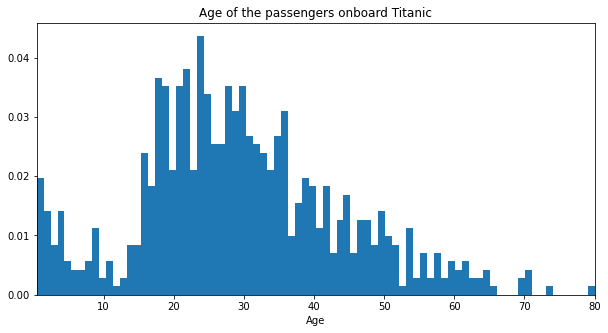

In [37]:
figure, ax = plt.subplots(figsize=(10,5))

ax.hist(titanic['Age'],
        bins = 80,      
        density = True)  

ax.set_xlim(titanic["Age"].min(),
           titanic["Age"].max())
ax.set_xlabel("Age")
ax.set_title("Age of the passengers onboard Titanic")

plt.savefig("plots/Titanic.png")

We can use `legend` to add a legend in the plot. However, we must then also specify a `label` in the `plot` function.

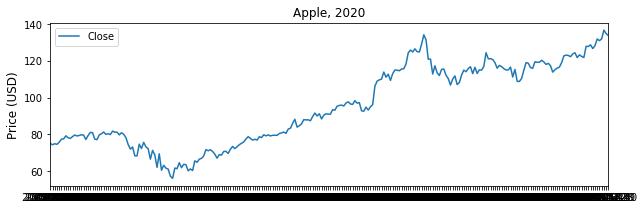

In [38]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(apple['Date'],
        apple['Close'],
        label = 'Close') # add label

ax.set_ylabel('Price (USD)', fontsize = 12)

ax.set_xlim(apple['Date'].min(), 
            apple['Date'].max()) 


ax.set_title('Apple, 2020')

# add legend
ax.legend()

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Use the figure with the line plots for both the <code>High</code> and <code>Low</code> columns in the <code>apple</code> data that we created above. Add a legend to the figure that indicates which line is <code>High</code> and which line is <code>Low</code>.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(apple['Date'],  
        apple['High'],
        label = 'High')

ax.plot(apple['Date'],  
        apple['Low'],
        label = 'Low') 

ax.legend()

ax.set_xlim(apple['Date'].min(), apple['Date'].max())
ax.set_ylabel('Price (USD)')
ax.set_title('Apple, 2020', fontsize = 16)

plt.show()
```

</p>
</details> 

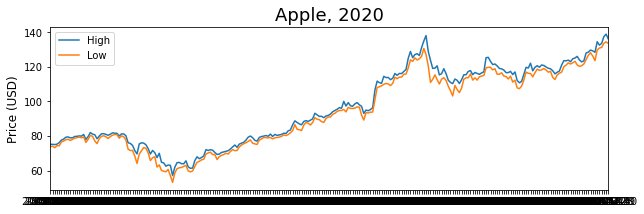

In [40]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(apple['Date'],
        apple['High'],
        label = 'High')

ax.plot(apple['Date'],
        apple['Low'],
        label = 'Low')

ax.set_ylabel('Price (USD)', fontsize = 12)

ax.set_xlim(apple['Date'].min(), 
            apple['Date'].max()) 


ax.set_title('Apple, 2020',fontsize=18)

# add legend
ax.legend()

plt.show()

## Subplots

Notice that a single `Figure` object can hold several `Axes` objects. We create multiple axes in the same figure by giving values to the `nrows` and `ncols` parameters in the `subplots` function.

This gives us multiple plots in the same figure (i.e. subplots).

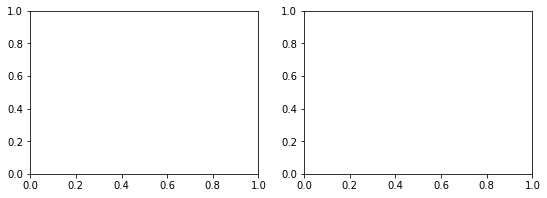

In [42]:
fig, ax = plt.subplots(nrows = 1,        # 1 row
                       ncols = 2,        # 2 columns
                       figsize = (9, 3)) 

plt.show()

`ax` now contains two `Axes` object for plotting.

In [43]:
len(ax)

2

In [44]:
ax[0]

<AxesSubplot:>

In [45]:
ax[1]

<AxesSubplot:>

When plotting, we must now select which `Axes` object to plot on.

Let us create line plots for the daily opening and closing price of the Apple stock in two seperate plots side by side.

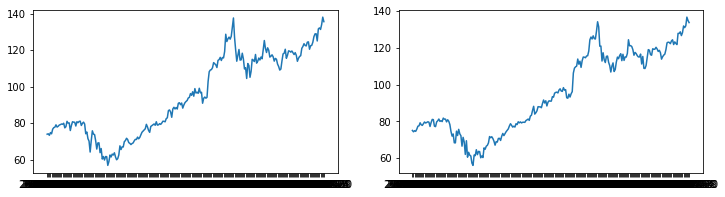

In [46]:
fig, ax = plt.subplots(nrows = 1,         # 1 row
                       ncols = 2,         # 2 columns
                       figsize = (12, 3))

# opening price
ax[0].plot(apple['Date'],
           apple['Open'])

# closing price
ax[1].plot(apple['Date'],
           apple['Close'])

plt.show()

Alternatively, we can stack the plots on top of each other.

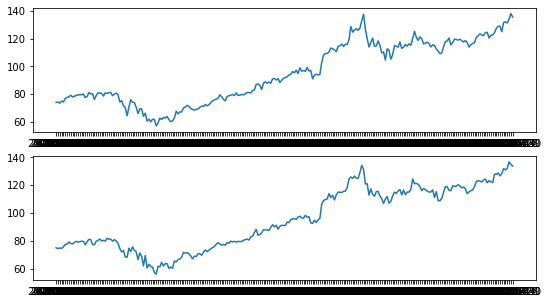

In [48]:
fig, ax = plt.subplots(nrows = 2,         # 1 row
                       ncols = 1,         # 2 columns
                       figsize = (9, 5))

# opening price
ax[0].plot(apple['Date'],
           apple['Open'])

# closing price
ax[1].plot(apple['Date'],
           apple['Close'])

plt.show()

We can still customize the plots as we previously did. However, we must specify which of the `Axes` objects that we want to customize.

Let us customize the subplots by adding titles to the subplots and figure.

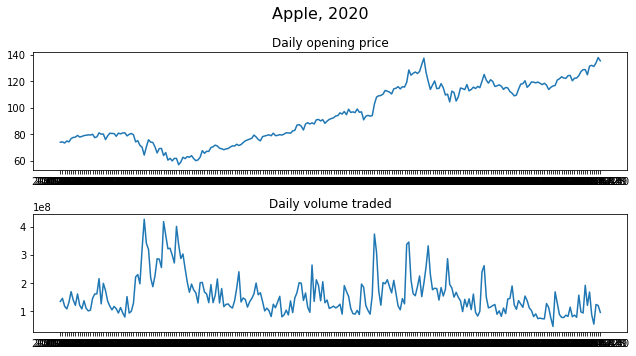

In [49]:
fig, ax = plt.subplots(nrows = 2,         
                       ncols = 1,         
                       figsize = (9, 5))

# opening price
ax[0].plot(apple['Date'],
           apple['Open']) 

# closing price
ax[1].plot(apple['Date'],
           apple['Volume'])

# add subplot titles
ax[0].set_title('Daily opening price')     # subplot 1 title
ax[1].set_title('Daily volume traded')     # subplot 2 title

# modify figure
fig.suptitle('Apple, 2020', fontsize = 16) # figure title
fig.tight_layout()                         # add this to increase space between subplots

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Add a label on the y-axis in each of the subplots in the figure above and store the final figure in the <code>plots</code> folder.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
fig, ax = plt.subplots(nrows = 2,         
                       ncols = 1,         
                       figsize = (9, 5))

# opening price
ax[0].plot(apple['Date'],
           apple['Open']) 

# closing price
ax[1].plot(apple['Date'],
           apple['Volume'])

# add axis labels
ax[0].set_ylabel('Price (USD)')
ax[1].set_ylabel('Price (USD)')

# add subplot titles
ax[0].set_title('Daily opening price')     
ax[1].set_title('Daily volume traded')     

# modify figure
fig.suptitle('Apple, 2020', fontsize = 16) 
fig.tight_layout()                         

plt.savefig('plots/Apple_subplots.png',  # path to plot
           bbox_inches = 'tight',        # add as a precautionary
           dpi = 300                     # increase resolution
)
```

</p>
</details> 

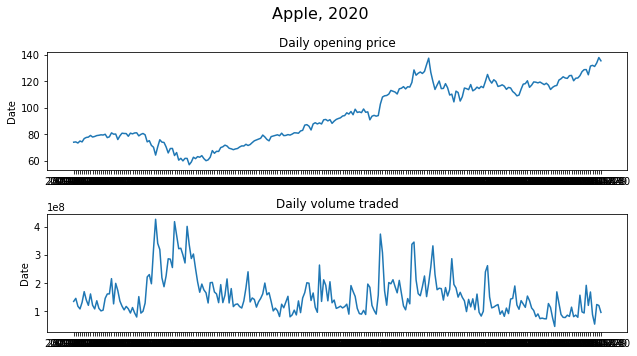

In [52]:
fig, ax = plt.subplots(nrows = 2,         
                       ncols = 1,         
                       figsize = (9, 5))

# opening price
ax[0].plot(apple['Date'],
           apple['Open']) 

# closing price
ax[1].plot(apple['Date'],
           apple['Volume'])

# add subplot titles
ax[0].set_title('Daily opening price')     # subplot 1 title
ax[1].set_title('Daily volume traded')     # subplot 2 title

ax[0].set_ylabel("Date")
ax[1].set_ylabel("Date")


# modify figure
fig.suptitle('Apple, 2020', fontsize = 16) # figure title
fig.tight_layout()                         # add this to increase space between subplots

plt.savefig('plots/Apple_subplots.png',bbox_inches='tight',
           dpi=300)

We can create as many subplots as we want by changing the values given to `nrows` and `ncols`.

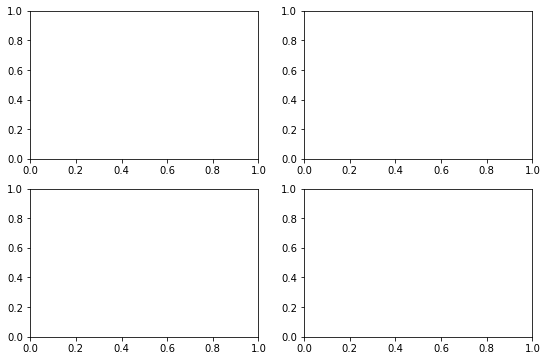

In [53]:
fig, ax = plt.subplots(nrows = 2,        # 2 rows
                       ncols = 2,        # 2 columns
                       figsize = (9, 6))

plt.show()

`ax` is now a 2 x 2 matrix containing the `Axes` objects.

In [54]:
ax.shape

(2, 2)

In [55]:
ax[0, 0] # 1st row, 1st column

<AxesSubplot:>

In [56]:
ax[1, 1] # 2nd row, 2nd column

<AxesSubplot:>

## Mandatory exercise, part 2

Again, import the file <code>mpg.xlsx</code> as a <code>DataFrame</code> and explore the data visually.

Create a figure with 2 x 2 subplots:

- In the first row, first column, show a histogram of <code>mpg</code>.


- In the first row, second column, show a scatter plot of <code>mpg</code> and <code>horsepower</code>.


- In the second row, first column, show a scatter plot of <code>mpg</code> and <code>weight</code>.


- In the second row, second column, show a scatter plot of <code>mpg</code> and <code>acceleration</code>.


Style the plots to make them look nice and save the figure as `mpg_plot.png`.

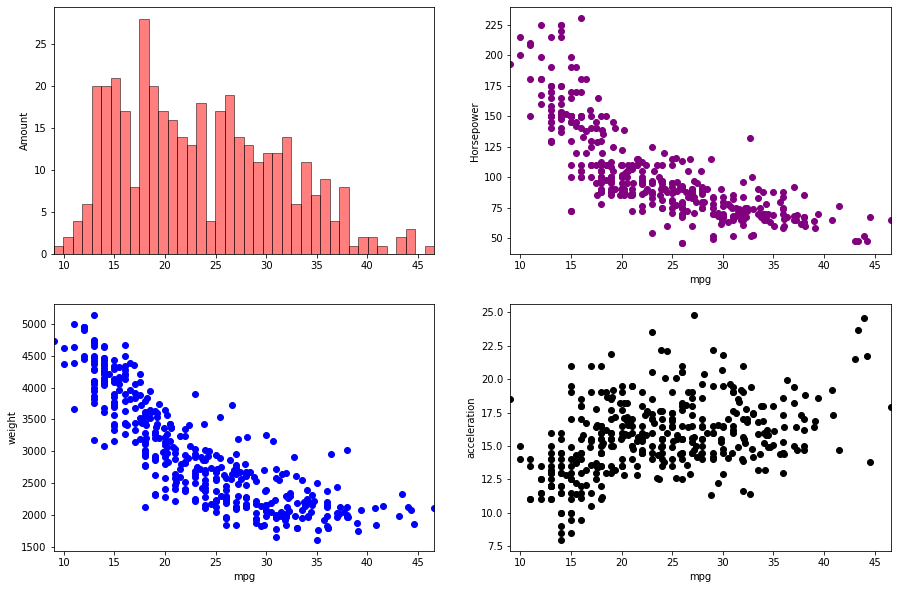

In [3]:
mpg = pd.read_excel("data/mpg.xlsx")

fig, ax = plt.subplots(nrows = 2,        # 2 rows
                       ncols = 2,        # 2 columns
                       figsize = (15, 10))

#1
ax[0,0].hist(mpg["mpg"],
            bins=40,
            color="red",
             edgecolor = 'black',
              alpha = 0.5)
ax[0,0].set_xlim(mpg['mpg'].min(), 
            mpg['mpg'].max())
#ax[0,0].set_title("MPG")
ax[0,0].set_ylabel("Amount")

#2
ax[0,1].scatter(mpg["mpg"],
               mpg["horsepower"],
                  color="purple")
ax[0,1].set_xlim(mpg['mpg'].min(), 
            mpg['mpg'].max())
ax[0,1].set_ylabel("Horsepower")
ax[0,1].set_xlabel("mpg")

#3
ax[1,0].scatter(mpg["mpg"],
               mpg["weight"],
               color="blue")
ax[1,0].set_xlim(mpg['mpg'].min(), 
            mpg['mpg'].max())
ax[1,0].set_ylabel("weight")
ax[1,0].set_xlabel("mpg")

#4
ax[1,1].scatter(mpg["mpg"],
               mpg["acceleration"],
               color="black")
ax[1,1].set_xlim(mpg['mpg'].min(), 
            mpg['mpg'].max())
ax[1,1].set_ylabel("acceleration")
ax[1,1].set_xlabel("mpg")


plt.savefig('plots/mgp_plot.png')